# Aggregates

In [63]:
# imports
%matplotlib inline
import os
from IPython.display import display
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [72]:
def get_title_from_file(file_name):
    file_name = file_name.replace("AGG__", "").replace("_", " ").replace(".csv", "")
    return file_name

TEST DATA: 


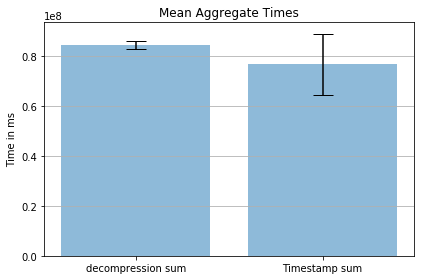

In [77]:
data_dir = "../data/dictionary/"
files = os.listdir(data_dir)
# FIXME currently only test data
print("TEST DATA: ")
label = []
means = []
error = []
for i, file_name in enumerate(files):
    if not file_name.lower().startswith('agg__'):
        continue
    data = pd.read_csv(data_dir + file_name).iloc[:,0]
    
    # Create Arrays for the plot
    label.append(get_title_from_file(file_name))
    means.append(data.mean())
    error.append(data.std())
    
x_pos = np.arange(len(label))

fig, ax = plt.subplots()
ax.bar(x_pos, means, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Time in ms')
ax.set_xticks(x_pos)
ax.set_xticklabels(label)
ax.set_title("Mean Aggregate Times")
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

       